## General-use Lerp program

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

### Sum-product of array values

In [32]:
def sum2(x, y, xn, yn): #takes an x-value array, y-value array and an index
    #e.g. sum_y(val[:,0], val[:,1], power of x, power of y)
    sum = 0
    if x.shape[0] <= y.shape[0]: #use the shorter list to avoid out of bounds
        for i in range(0, x.shape[0]):
            sum += (y[i]**yn)*(x[i]**xn)
    else:
        for i in range(0, y.shape[0]):
            sum += (y[i]**yn)*(x[i]**xn)
    return sum

### Linear interpolation

In [33]:
def lerp(x, y):
    a1 = ((x.shape[0]*sum2(x,y,1,1))-(sum2(x,y,1,0)*sum2(x,y,0,1)))/((x.shape[0]*sum2(x,y,2,0))-(sum2(x,y,1,0))**2)
    a0 = (sum2(x,y,0,1)/x.shape[0])-(a1*(sum2(x,y,1,0)/x.shape[0]))
    return [a0, a1]

In [34]:
x = np.array([
0.526993994,
0.691126852,
0.745407955,
0.669344512,
0.518168748,
0.291558862,
0.010870453,
0.71818573,
0.897190954,
0.476789102,
])
y = np.array([
3.477982975,
4.197925374,
4.127080815,
3.365719179,
3.387060084,
1.829099436,
0.658137249,
4.023164612,
5.074088869,
2.752890033,
])
a = lerp(x,y)

A0: 0.5683350482726 
A1: 4.906523335086163


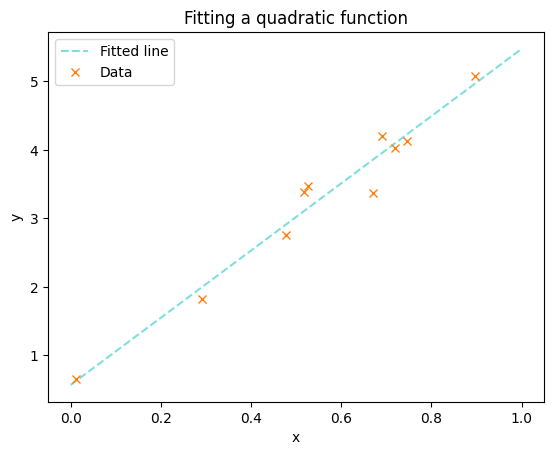

In [35]:
X1, X2 = x, np.linspace(0,1,23)
Y1, Y2 = y, (a[0] + a[1]*X2)
fig, ax = plt.subplots()
ax.plot(X2, Y2, color="c", alpha=0.5, linestyle='--', label='Fitted line')
ax.plot(X1, Y1, color="C1", marker='x', linestyle='none', label='Data')
ax.set_title('Fitting a linear function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="upper left")
print('A0:', a[0], '\nA1:', a[1])